<a href="https://colab.research.google.com/github/aqilaazza/mini-bootcamp-data-analyst-python/blob/main/data-cleaning/missing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
data = {
    'A' : [1, 2, None, 5],
    'B' : [1, 2, 3, 4],
    'C' : [None, 2, 3, None],
    'D' : [1, 2, 3, 4]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,1,NaN,1
1,2.0,2,2.0,2
2,NaN,3,3.0,3
3,5.0,4,NaN,4


# Mengetahui Data Kosong

In [5]:
df.info() #data kosong jika nilai entris beda dengan nilai kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       4 non-null      int64  
 2   C       2 non-null      float64
 3   D       4 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 260.0 bytes


In [6]:
df.isnull() #true jika kosong

,A,B,C,D
0,False,False,True,False
1,False,False,False,False
2,True,False,False,False
3,False,False,True,False


In [7]:
df.isnull().sum()

,0
A,1
B,0
C,2
D,0


# Mengatasi Data Kosong

Mengahpus kolom/baris data kosong dengan method dopna()

jika 99% data NaN bisa dihapus, jika hanya 1 atau 2 tdak perlu dihapus

In [10]:
df.dropna(axis=0) #mengapus semua  baris data NaN

,A,B,C,D
1,2.0,2,2.0,2


In [11]:
df.dropna(axis=1)  #mengapus semua kolom data NaN

,B,D
0,1,1
1,2,2
2,3,3
3,4,4


Mengisi data kosong dengan Method fillna()

In [12]:
df

,A,B,C,D
0,1.0,1,NaN,1
1,2.0,2,2.0,2
2,NaN,3,3.0,3
3,5.0,4,NaN,4


In [13]:
df.fillna(0) # mengisi dengan nilai 0

,A,B,C,D
0,1.0,1,0.0,1
1,2.0,2,2.0,2
2,0.0,3,3.0,3
3,5.0,4,0.0,4


In [14]:
df.fillna(1) # mengisi dengan nilai 1

,A,B,C,D
0,1.0,1,1.0,1
1,2.0,2,2.0,2
2,1.0,3,3.0,3
3,5.0,4,1.0,4


In [15]:
df.fillna(df.mean()) # mengisi dengan nilai rata rata

,A,B,C,D
0,1.000000,1,2.5,1
1,2.000000,2,2.0,2
2,2.666667,3,3.0,3
3,5.000000,4,2.5,4


In [16]:
df.fillna(df.median()) # mengisi dengan nilai median

,A,B,C,D
0,1.0,1,2.5,1
1,2.0,2,2.0,2
2,2.0,3,3.0,3
3,5.0,4,2.5,4


In [17]:
df.fillna(method= 'bfill') #mengisi nilai sebelumnya

/tmp/ipython-input-17-2174610352.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'bfill')


,A,B,C,D
0,1.0,1,2.0,1
1,2.0,2,2.0,2
2,5.0,3,3.0,3
3,5.0,4,NaN,4


In [18]:
df.fillna(method= 'ffill') #mengisi nilai setelahnya

/tmp/ipython-input-18-1009771976.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'ffill') #mengisi nilai setelahnya


,A,B,C,D
0,1.0,1,NaN,1
1,2.0,2,2.0,2
2,2.0,3,3.0,3
3,5.0,4,3.0,4


Mengisi Data Kosong dengan Method interpolate()

Mengisi data kosong dengan interpelasi nilai

In [19]:
data = {
    'A' : [1, 2, None, 5],
    'B' : [1, 2, 3, 4],
    'C' : [1, 2, 3, None],
    'D' : [None, 2, 3, 4]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,1,1.0,NaN
1,2.0,2,2.0,2.0
2,NaN,3,3.0,3.0
3,5.0,4,NaN,4.0


In [21]:
df.interpolate(method='linear') #memperhitungkan baris pada kolom

,A,B,C,D
0,1.0,1,1.0,NaN
1,2.0,2,2.0,2.0
2,3.5,3,3.0,3.0
3,5.0,4,3.0,4.0


Implementasi dengan data pokemon

In [22]:
df_pokemon = pd.read_csv('/content/drive/MyDrive/Sertifikasi Data Analyst UDEMY/Sample Data/Pokemon.csv')
df_pokemon

,Num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [24]:
df.isnull().sum()

,0
A,1
B,0
C,1
D,1


In [29]:
# instal library missingno
!pip install missingno

In [30]:
import missingno as msno

<Axes: >

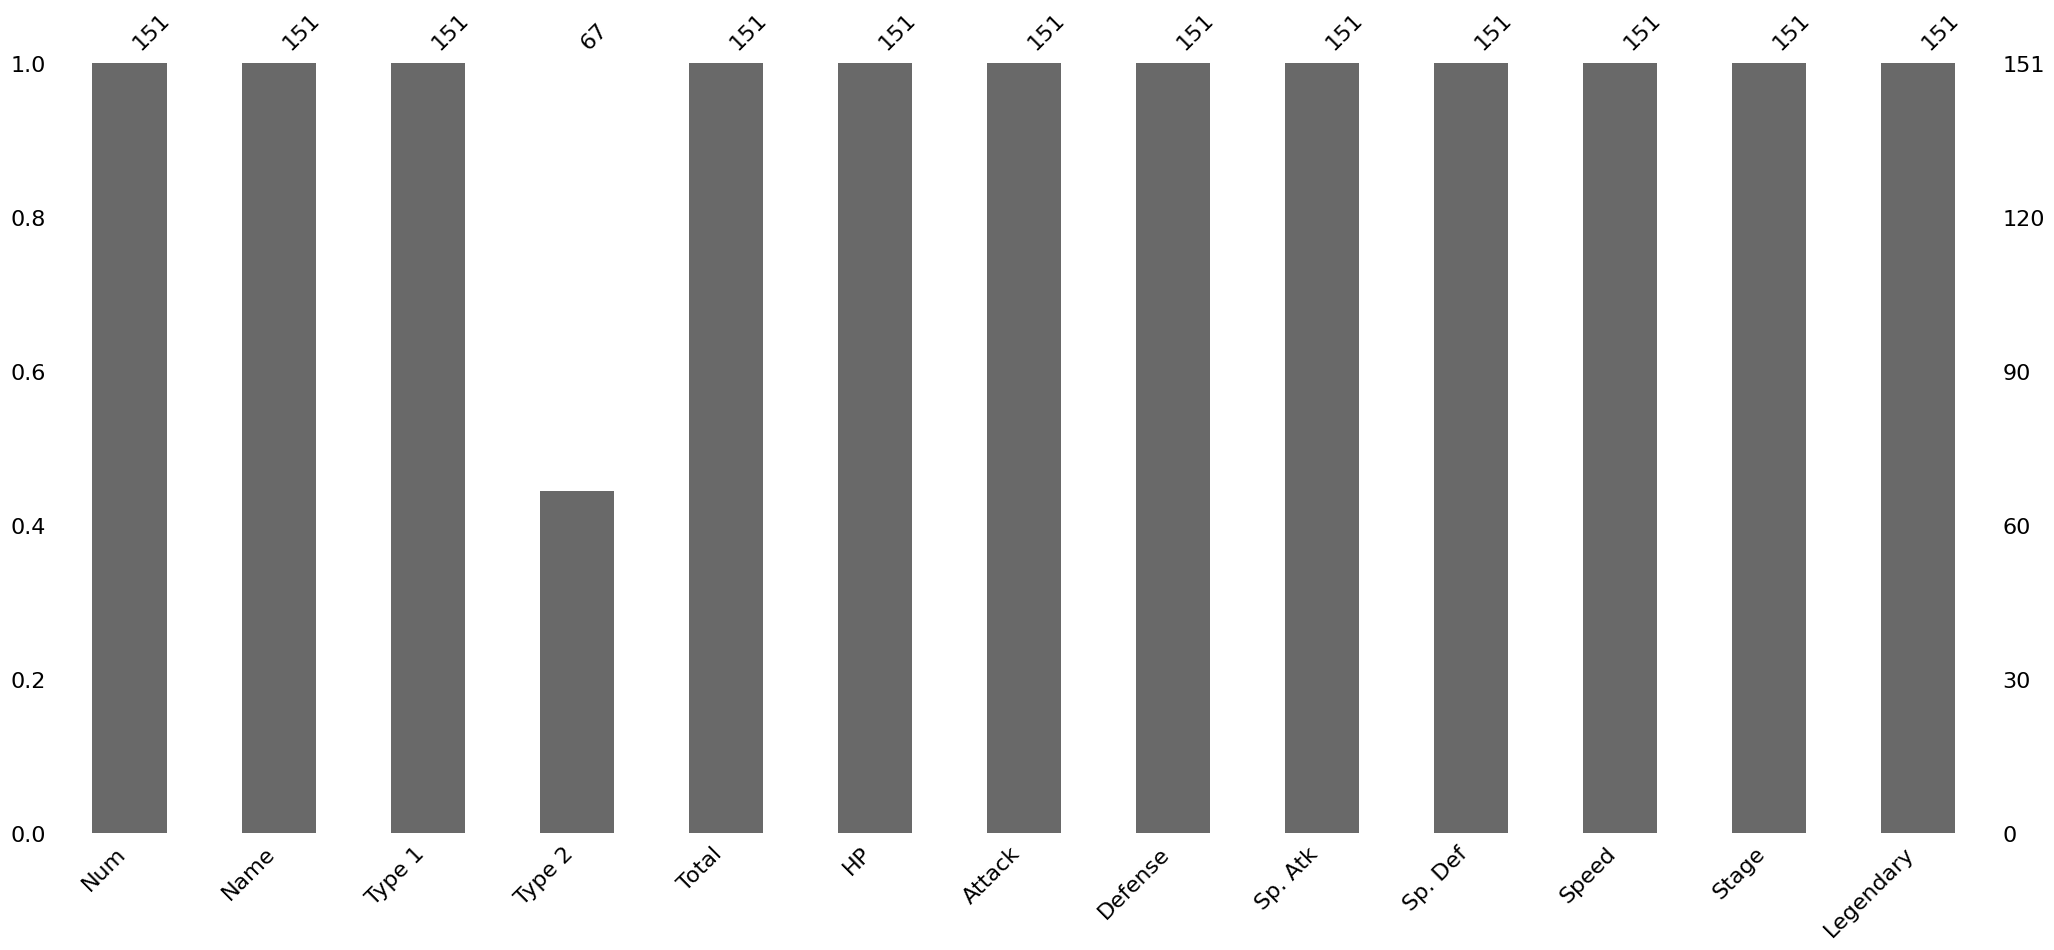

In [31]:
msno.bar(df_pokemon)

<Axes: >

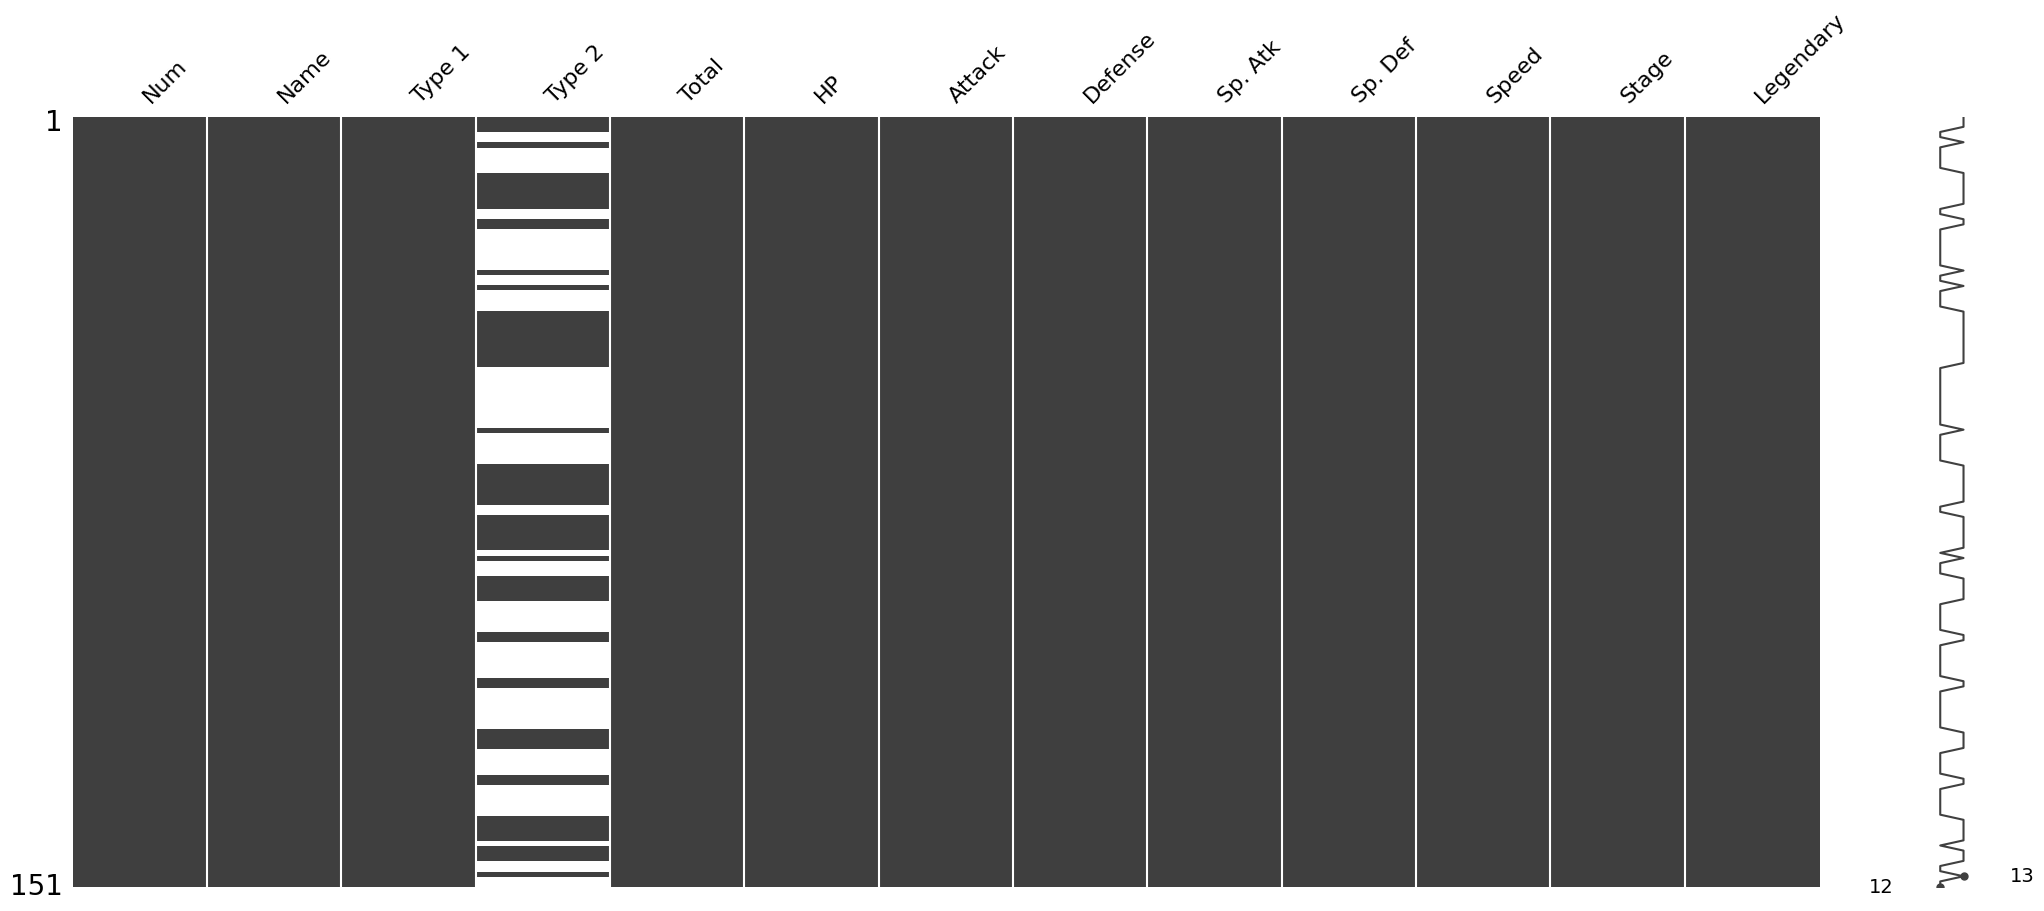

In [32]:
msno.matrix(df_pokemon) #mengidentifikasi berdasarkan baris